<a href="https://colab.research.google.com/github/DikshyaL/Regression_Models/blob/main/Logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("neurocipher/student-performance")

print("Path to dataset files:", path)
os.listdir(path)

Using Colab cache for faster access to the 'student-performance' dataset.
Path to dataset files: /kaggle/input/student-performance


['StudentPerformance.csv']

In [22]:
import pandas as pd
import numpy as np

df= pd.read_csv(path + "/StudentPerformance.csv")
print(df.head())
print(df.shape)
print(df.size)
print(df.columns)
print(df.describe())
print(df.info())
print(df.isnull().sum())
print(df.duplicated().sum())

   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  
(10000, 6)
60000
Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')
   

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df["Extracurricular Activities"] = df["Extracurricular Activities"].map({
    "Yes": 1,
    "No": 0
})
df["Pass_Fail"] = np.where(df["Performance Index"]>= 40 , 1,0)
features =["Hours Studied",
           "Previous Scores",
           "Extracurricular Activities",
           "Sleep Hours",
           "Sample Question Papers Practiced"]

X = df[features]
y =df["Pass_Fail"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

model = LogisticRegression(max_iter = 1000)
model.fit(X_train_s, y_train)

y_pred = model.predict(X_test_s)


In [24]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9745
Confusion Matrix:
 [[ 444   35]
 [  16 1505]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       479
           1       0.98      0.99      0.98      1521

    accuracy                           0.97      2000
   macro avg       0.97      0.96      0.96      2000
weighted avg       0.97      0.97      0.97      2000



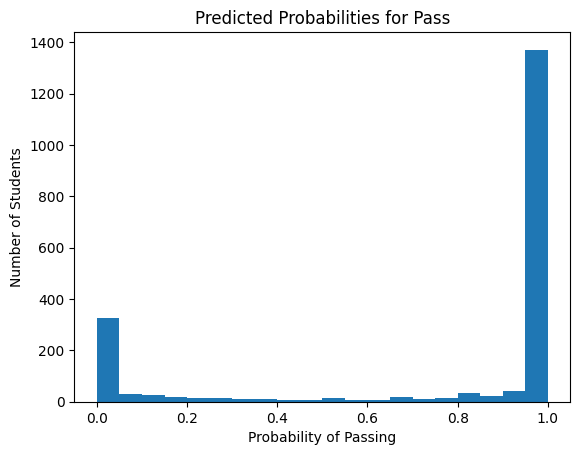

In [25]:
import matplotlib.pyplot as plt

y_prob = model.predict_proba(X_test_s)[:, 1]  # Probability of passing
plt.hist(y_prob, bins=20)
plt.xlabel("Probability of Passing")
plt.ylabel("Number of Students")
plt.title("Predicted Probabilities for Pass")
plt.show()
